I'm now pretty good at Matplotlib and Seaborn (I found mpl pretty obstuse for ages with its two approaches (OOP vs stateful), whereas Seaborn is far easier out-of-the-box) and would now like to give Plotly a go as interactive plots sound like they could unlock some much needed user-accessibility/ interactability which would be good for reports at work

In [27]:
%load_ext lab_black

In [1]:
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
import seaborn as sns
import math
from alex_module import df_prepper
from alex_module import plotter
from alex_module import df_describer

df = pd.read_csv('raw_data/all_energy_statistics1.csv')
df = df_prepper.csv_combiner(df,verbose=False)

df_ = df_prepper.df_groupby_then_flatten(df,
                                         cols_to_keep=['country_or_area','commodity_transaction','year','unit','quantity','category'],
                                        cols_to_groupby=['country_or_area','year','category'],
                                        aggregate='sum')

# Time series line plot

## Matplotlib function to plot multiple countries and energy types

In [2]:
def mpl_line_plot(df,countries,columns):
    '''Plot time series values of energy types for different countries
    
    Parameters
    ----------
    df : pandas dataframe
    countries : list
    column : list
    '''
    fig = plt.figure()
    ax = plt.axes()
    
    # Limit dataframe to requested countries
    df = df_[df_['country_or_area'].isin(countries)].copy()

    # Limited dataframe to requested columns, plus country_or_area as this data is needed
    columns.append('country_or_area')
    df = df[columns]
    
    # Performing a groupby 
    df = df.groupby(['year','country_or_area']).sum().copy()
    
    # Unstacking the groupby to make separate columns per country
    df = df.unstack().copy()
    
    ax.plot(df)
    
    # TODO: Add some code to clean up the column names for the legend
    # TODO: Alter the line colours to try and group by country. Maybe one country is 1 colour at varying transparencies
    
    ax.legend(df.columns)

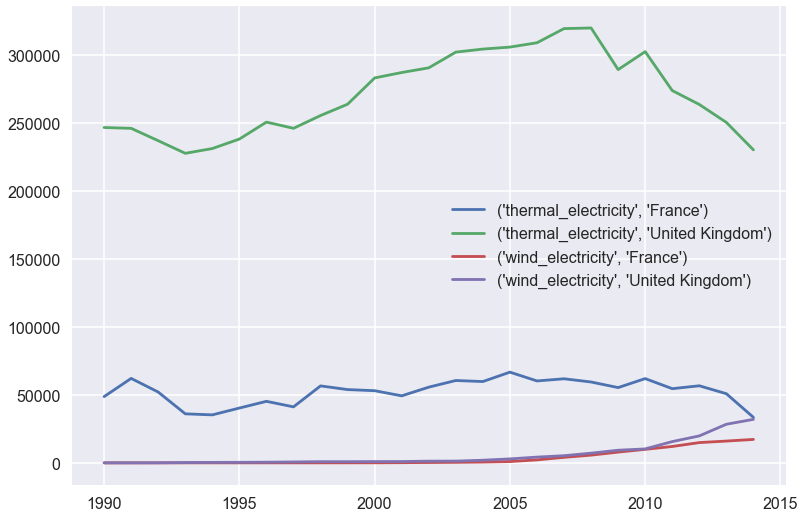

In [3]:
mpl_line_plot(df_,countries=['United Kingdom','France'],columns=['thermal_electricity','wind_electricity'])

In [5]:
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=733ed6069f6a8ec6049dc3bf514c28336da7e382aa0f232e86b1e5713a0b49eb
  Stored in directory: c:\users\alex.large\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [7]:
import plotly.express as px

In [ ]:
mpl_line_plot(df_,countries=['United Kingdom','France'],columns=['thermal_electricity','wind_electricity'])

In [36]:
df_new = df_.query(
    'country_or_area == "United Kingdom" or country_or_area == "France"'
)[["country_or_area", "thermal_electricity"]].copy()

df_new_uk = df_new[df_new["country_or_area"] == "United Kingdom"].copy()
df_new_fr = df_new[df_new["country_or_area"] == "France"].copy()

df_new = df_new_uk.merge(df_new_fr, right_index=True, left_index=True, how="left")

df_new.rename(
    columns={
        "thermal_electricity_x": "UK Thermal",
        "thermal_electricity_y": "France Thermal",
    },
    inplace=True,
)

df_new.drop(["country_or_area_x", "country_or_area_y"], axis=1, inplace=True)

In [37]:
df_new

category  UK Thermal  France Thermal
year                                
1990        246790.0         48749.0
1991        246174.0         62153.0
1992        237068.0         52094.0
1993        227792.0         36075.0
1994        231306.0         35311.0
1995        238296.0         40338.0
1996        250761.0         45277.0
1997        246198.0         41205.0
1998        255598.0         56640.0
1999        263930.0         53925.0
2000        283278.0         53099.0
2001        287251.0         49321.0
2002        290701.0         55707.0
2003        302272.0         60604.0
2004        304506.0         59841.0
2005        305973.0         66747.0
2006        309149.0         60279.0
2007        319578.0         61874.0
2008        320033.0         59500.0
2009        289403.0         55396.0
2010        302618.0         62010.0
2011        273961.0         54594.0
2012        263734.0         56722.0
2013        250539.0         50877.0
2014        230342.0         33484.0

In [38]:
df_new = df_.query(
    'country_or_area == "United Kingdom" or country_or_area == "France"'
)[["country_or_area", "thermal_electricity"]].copy()

In [39]:
df_new

category country_or_area  thermal_electricity
year                                         
1990              France              48749.0
1991              France              62153.0
1992              France              52094.0
1993              France              36075.0
1994              France              35311.0
1995              France              40338.0
1996              France              45277.0
1997              France              41205.0
1998              France              56640.0
1999              France              53925.0
2000              France              53099.0
2001              France              49321.0
2002              France              55707.0
2003              France              60604.0
2004              France              59841.0
2005              France              66747.0
2006              France              60279.0
2007              France              61874.0
2008              France              59500.0
2009              France              55396.0
2010              France              62010.0
2011              France              54594.0
2012              France              56722.0
2013              France              50877.0
2014              France              33484.0
1990      United Kingdom             246790.0
1991      United Kingdom             246174.0
1992      United Kingdom             237068.0
1993      United Kingdom             227792.0
1994      United Kingdom             231306.0
1995      United Kingdom             238296.0
1996      United Kingdom             250761.0
1997      United Kingdom             246198.0
1998      United Kingdom             255598.0
1999      United Kingdom             263930.0
2000      United Kingdom             283278.0
2001      United Kingdom             287251.0
2002      United Kingdom             290701.0
2003      United Kingdom             302272.0
2004      United Kingdom             304506.0
2005      United Kingdom             305973.0
2006      United Kingdom             309149.0
2007      United Kingdom             319578.0
2008      United Kingdom             320033.0
2009      United Kingdom             289403.0
2010      United Kingdom             302618.0
2011      United Kingdom             273961.0
2012      United Kingdom             263734.0
2013      United Kingdom             250539.0
2014      United Kingdom             230342.0

In [43]:
fig = px.line(
    df_new,
    x=df_new.index,
    y=df_new["thermal_electricity"],
    color="country_or_area",
    line_group="country_or_area",
    hover_name="country_or_area",
    line_shape="spline",
    render_mode="svg",
)
fig.show()